In [1]:
import numpy as np
import pylab as plt
import netCDF4 as nc
import os

In [2]:
#Loop over the columns 
N = 4
column_data = []
for n in range(N):
    path = './couple_' + str(n)
    path = os.path.join(path, 'rico')
    path = os.path.join(path, 'stats.nc')
    column_data.append(nc.Dataset(path, 'r'))

48.27299854345066
48.197941593912084
48.23359634672759
48.26953308101547


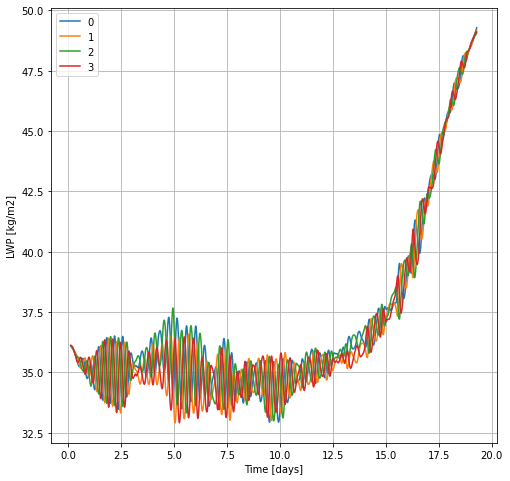

In [3]:
#var = 'LWP'
#plt.figure()
lwp_mean = []
data_pack = []
plt.figure(figsize=(8,8))
Nt =   6 * 6   #6*12#6 * 24*4#* 48
for n in range(N):
    #plt.subplot(4,1,n+1)
    micro = column_data[n]['MicroBase']
    data = micro['timeseries']['LWP'][:]  +  micro['timeseries']['VWP'][:] +  micro['timeseries']['RWP'][:]
    lwp_mean.append(np.mean(data[6*6:]))
    data = np.convolve(data, np.ones(Nt)/Nt, mode='valid')
    time = micro['timeseries']['time'][:]
    time = np.convolve(time, np.ones(Nt)/Nt, mode='valid')
    plt.plot(time/86400,data,label=str(n))
    data_pack.append(data)
    plt.xlabel('Time [days]')
    plt.ylabel('LWP [kg/m2]')
    print(np.mean(data[-60*2:]))

plt.legend()
plt.grid()
plt.savefig('qc.png', dpi=400)
    #plt.ylim(0.0, 0.41)

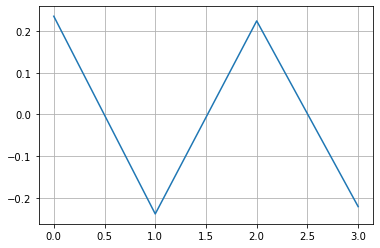

In [4]:
plt.plot(100.0*(np.array(lwp_mean)-np.mean(lwp_mean))/np.mean(lwp_mean))
plt.grid()

In [5]:
def convert_to_array(data_pack):
    
    min_len = 0
    for d in data_pack:
        min_len = np.maximum(len(d), min_len)
    
    
    #Now stack the array
    array = None
    for d in data_pack:

        if array is None:
            array = d
        else:
            array = np.vstack((array[:min_len],d))
    
    print(np.shape(array))    
    return



#print(data_pack)
#convert_to_array(data_pack)

-1.8970800296795451
-2.297387356648819
-1.987806728299337
-1.7260707233231385


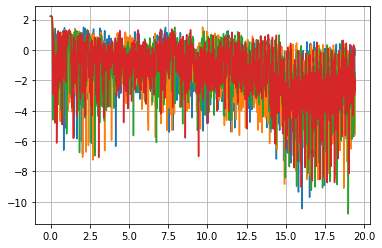

In [6]:
grp = 'VelocityState'
var = 'u_min'
#plt.figure()
data_pack = []
for n in range(N):
    micro = column_data[n][grp]
    data = micro['timeseries'][var][:]
    time = micro['timeseries']['time'][:]
    plt.plot(time/86400,data)
    data_pack.append(data)
    
    print(np.mean(data[-60:]))
    
plt.grid()

5.37795644258787
5.3776191587288364
5.380353884023119
5.378663174781528


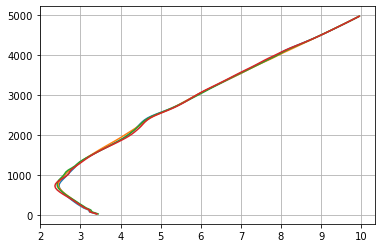

In [7]:
grp = 'VelocityState'
var = 'u'
#plt.figure()
data_pack = []
for n in range(N):
    micro = column_data[n][grp]
    data = np.mean(micro['profiles'][var][-60:,:], axis=0)
    z = micro['profiles']['z'][:]
    plt.plot(data, z)
    data_pack.append(data)
    
    print(np.mean(data[-360:]))
    
plt.grid()
plt.savefig('u.png')

0.007107866737795659
0.007114229142271475
0.007141907597223837
0.0071439079289017755


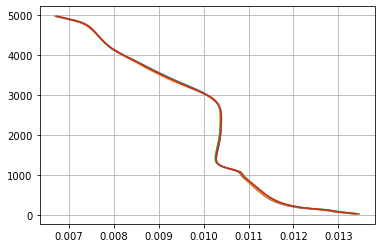

In [8]:
grp = 'ScalarState'
var = 'qv'
#plt.figure()
data_pack = []
for n in range(N):
    micro = column_data[n][grp]
    data = np.mean(micro['profiles'][var][-6*24:,:], axis=0) 
    z = micro['profiles']['z'][:]
    plt.plot(data, z)
    data_pack.append(data)
    
    print(np.mean(data[-6:]))
    
plt.grid()
plt.savefig('qc2.png')

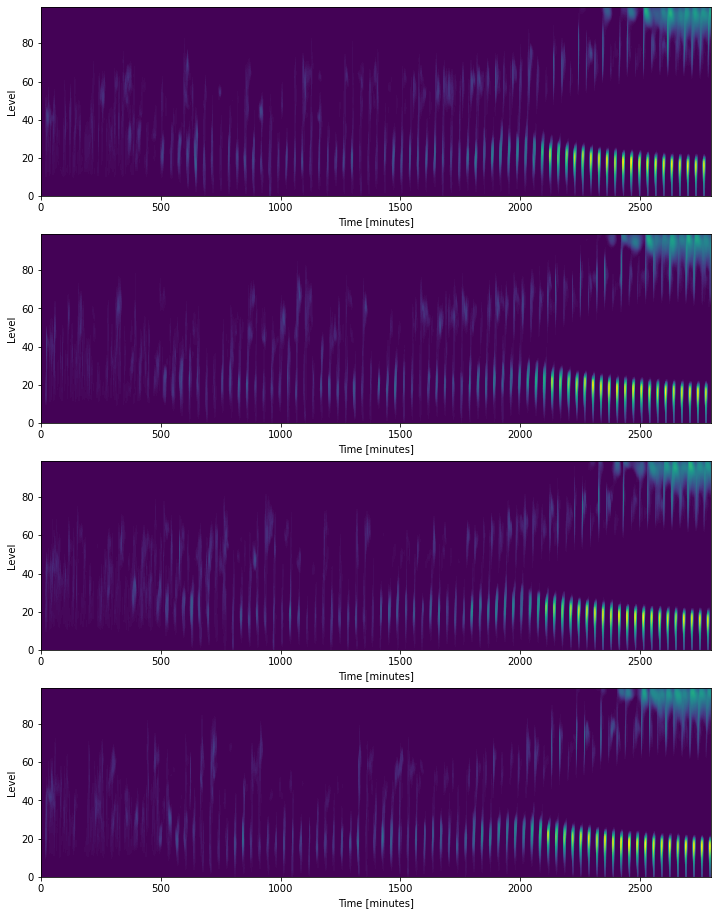

In [9]:
grp = 'ScalarState'
var = 'qc'
plt.figure(figsize=(12,16))
for n in range(N):
    plt.subplot(4,1,n+1)
    micro = column_data[n][grp]
    data = micro['profiles'][var][:,:]
    #z = micro['profiles']['z'][:]
    plt.contourf(data.T, 100)
    plt.xlabel('Time [minutes]')
    plt.ylabel('Level')
plt.savefig('qc_cross.png')


    

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: couple_0, couple_1, couple_2, couple_3
<class 'netCDF4._netCDF4.Group'>
group /couple_0:
    dimensions(sizes): z(100), t(2794)
    variables(dimensions): float64 z(z), float64 t(t), float64 qv_ss_forcing(t,z), float64 qv_ls_forcing(t,z), float64 qv_ls_state(t,z), float64 qc_ss_forcing(t,z), float64 qc_ls_forcing(t,z), float64 qc_ls_state(t,z), float64 s_ss_forcing(t,z), float64 s_ls_forcing(t,z), float64 s_ls_state(t,z)
    groups: 
1397
<class 'netCDF4._netCDF4.Group'>
group /couple_1:
    dimensions(sizes): z(100), t(2794)
    variables(dimensions): float64 z(z), float64 t(t), float64 qv_ss_forcing(t,z), float64 qv_ls_forcing(t,z), float64 qv_ls_state(t,z), float64 qc_ss_forcing(t,z), float64 qc_ls_forcing(t,z), float64 qc_ls_state(t,z), float64 s_ss_forcing(t,z), float64 s_ls_forcing(t,z), float64 s_ls_state(t,z)
    groups: 
1397
<cl

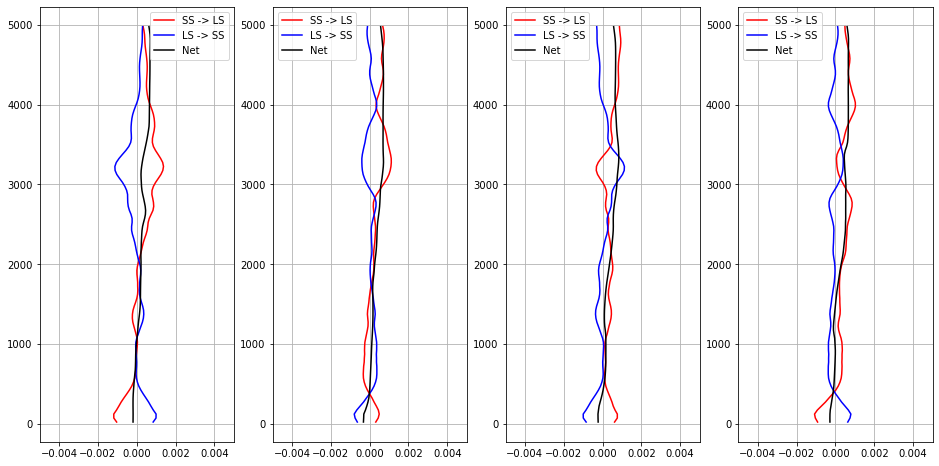

In [10]:
couple_grp = nc.Dataset('couple_out_rico.nc', 'r')
print(couple_grp)



plt.figure(figsize=(16,8))
count = 1

for c in couple_grp.groups:
    plt.subplot(1,4,count)
    grp_n = couple_grp[c]
    
    print(grp_n)

    n = int(len(grp_n['t'][:])*5/10.)
    print(n)
    
    qc_ss_forcing = np.mean(grp_n['qc_ss_forcing'][-n:,:], axis=0)
    qc_ls_forcing = np.mean(grp_n['qc_ls_forcing'][-n:,:], axis=0)
    
    qv_ss_forcing = np.mean(grp_n['qv_ss_forcing'][-n:,:], axis=0) 
    qv_ls_forcing = np.mean(grp_n['qv_ls_forcing'][-n:,:], axis=0) 
    
    net_q_ss = qc_ss_forcing +  qv_ss_forcing
    net_q_ls = qc_ls_forcing+  qv_ls_forcing
    net_q = net_q_ss + net_q_ls
    
    z = grp_n['z'][:]
    
    plt.plot((net_q_ss) * 86400, z, '-r', label = 'SS -> LS')
    plt.plot((net_q_ls)* 86400, z, '-b', label = 'LS -> SS')
    plt.plot((net_q) * 86400, z, '-k', label='Net')
    count += 1 
    plt.grid()
    plt.legend()
    plt.xlim(-0.005, 0.005)